In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period_Boyd.dat
2022_Feb_week4_Linear_fit_period_This_work.dat
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
2022_Feb_week4_Weighted_mean_calculation_This_work_combined_Boyd.out
2022_Feb_week4_new_ephemeris_LTT_fit.jpg
2022_Feb_week4_new_ephemeris_LTT_fit_Beuermann_2011.jpg
DPLeo.txt
DP_Leo_LTT_fit.ipynb
DP_Leo_LTT_fit_Beuermann_2011.ipynb
DP_Leo_LTT_fit_Beuermann_2011_Res.jpg
DP_Leo_LTT_fit_Boyd.ipynb
DP_Leo_LTT_fit_Boyd_Res.jpg
DP_Leo_LTT_fit_Demo.ipynb
DP_Leo_LTT_fit_Demo.jpg
DP_Leo_LTT_fit_Demo1.ipynb
DP_Leo_LTT_fit_Demo1.jpg
DP_Leo_LTT_fit_Demo1_Res.jpg
DP_Leo_LTT_fit_Demo_Res.jpg
DP_Leo_LTT_fit_Res.jpg
DP_Leo_LTT_fit_weighted_data.ipynb
DP_Leo_LTT_fit_weighted_data.jpg
DP_Leo_LTT_fit_weighted_data_Beuermann_2011.ipynb
DP_Leo_LTT_fit_weighted_data_Beuermann_2011_Res.jpg
DP_L

In [3]:
#Read data ---#1
Input = "2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

len_x = len(x)
#print(len_x)
#print(x)

In [5]:
K = 33.7        #m/s
e = 0.39               #No-unit
w = -1.36           #rad

In [6]:
def LTT_fit(x,K,e,b,w):
    return K*(1 - e*e)*np.sin(b*x - np.radians(w))/(1 + e*np.cos(b*x))

In [15]:
import scipy.optimize as optimization  
#guess = (K,e,b,w)
guess = [41.9455, 0.39, 0.0005, -1.36]
params, params_covariance = optimization.curve_fit(LTT_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [16]:
K = params[0]
e = params[1]
b = params[2]
w = params[3]

dK = params_covariance[0,0]
de = params_covariance[1,1]
db = params_covariance[2,2]
dw = params_covariance[3,3]

ocfit = LTT_fit(x,K,e,b,w)


print("The Keplerian parameters:")
print("K =", K, "+/-", dK**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

The Keplerian parameters:
K = -48.04641505637793 +/- 0.8565130616585463 [s]
e = -0.1249681150903946 +/- 0.01902940002207346 [days]
b = 0.0004866849762205311 +/- 4.360869627495167e-06 [rad]
w = -52.97133274543924 +/- 14.335954737456223 [rad]
w_deg = -3035.0338014968047 +/- 821.3897017468197 [deg]


In [17]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = LTT_fit(x_line, *params) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq)

[ 18.58751792  31.06802744  40.11019063  41.57688375  25.93465979
  21.93126187  14.17180987 -46.47701946 -50.73145474 -27.44024763
 -27.00161859 -26.40047689 -25.81136952 -22.96164205 -22.45581523
 -21.42421288 -20.63583665 -17.54009166  10.70464189  18.14928642
  28.86991     29.78078135  29.78078135  38.50221892  40.93302099]
Reduced_chisq: 1.873809517517294


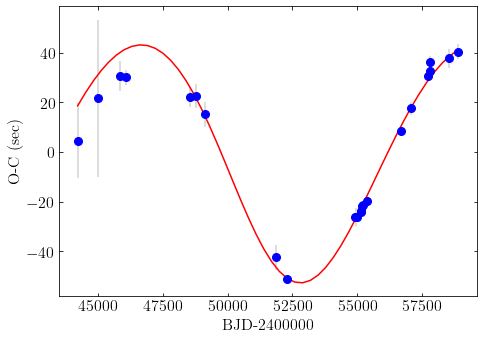

In [18]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(7, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line,y_line,'-r')
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.show()

In [19]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    y_range[i] = LTT_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

In [20]:
InputFile_out = "interporate.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range = Data_out[:,1]
y_range = Data_out[:,2]

#print(y_range)

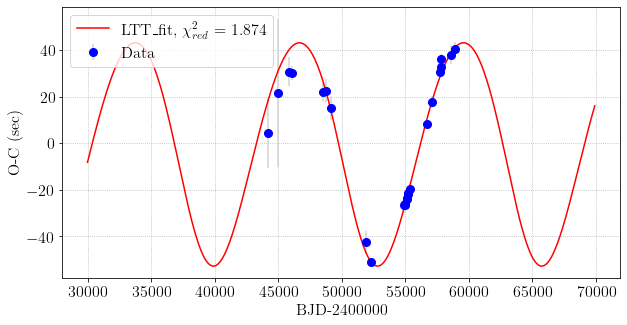

In [13]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_range, y_range, '-', color='red',label='LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("DP_Leo_LTT_fit_Demo.jpg", dpi=1000)
plt.show()

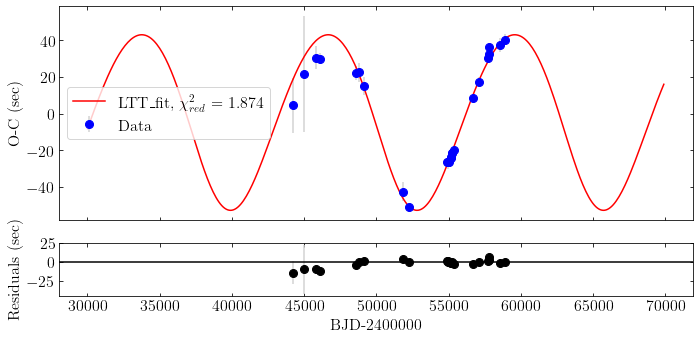

In [14]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
ax0.plot(x_range, y_range, '-', color='red',label='LTT\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.set_ylabel('O-C (sec)')
ax0.legend(loc="best")

Residual = y-ocfit

ax1.set_ylabel('Residuals (sec)')
ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')

plt.savefig("DP_Leo_LTT_fit_weighted_data_Demo_Res.jpg", dpi=1000)

plt.show()